In [1]:
!pip install climetlab
#!pip install climetlab-maelstrom-ens10

In [2]:
import climetlab as cml

In [3]:
cmlds = cml.load_dataset(
        'maelstrom-ens10',
        date='20170101',
        dtype='sfc'
    )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/spcl/climetlab_maelstrom_ens10/LICENSE If you do not agree with such terms, do not download the data. 


In [4]:
ds = cmlds.to_xarray()
ds

<xarray.Dataset>
Dimensions:     (latitude: 361, longitude: 720, number: 10, step: 3, surface: 1, time: 20)
Coordinates:
  * number      (number) int64 1 2 3 4 5 6 7 8 9 10
  * time        (time) datetime64[ns] 1998-01-01 1999-01-01 ... 2017-01-01
  * step        (step) timedelta64[ns] 0 days 1 days 2 days
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(20, 3), meta=np.ndarray>
Data variables:
    sst         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    tcw         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    tcwv        (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    cp          (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    msl         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    tcc         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    u10         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    v10         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    t2m         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    tp          (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
    skt         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 1, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-07-31T13:02 GRIB to CDM+CF via cfgrib-0.9.9...

Let's look at one of those parameters --- `t2m`, the temperature at 2 meters above ground. We can see all the information on the dimensions, and the coordinate system below:

In [5]:
ds['t2m']

<xarray.DataArray 't2m' (number: 10, time: 20, step: 3, surface: 1, latitude: 361, longitude: 720)>
dask.array<open_dataset-c00c8463e7864bc8e3bca75ce8a1438bt2m, shape=(10, 20, 3, 1, 361, 720), dtype=float32, chunksize=(10, 20, 3, 1, 361, 720), chunktype=numpy.ndarray>
Coordinates:
  * number      (number) int64 1 2 3 4 5 6 7 8 9 10
  * time        (time) datetime64[ns] 1998-01-01 1999-01-01 ... 2017-01-01
  * step        (step) timedelta64[ns] 0 days 1 days 2 days
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(20, 3), meta=np.ndarray>
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            pf
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         11
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

With CliMetLab, we can also draw this information on a map:

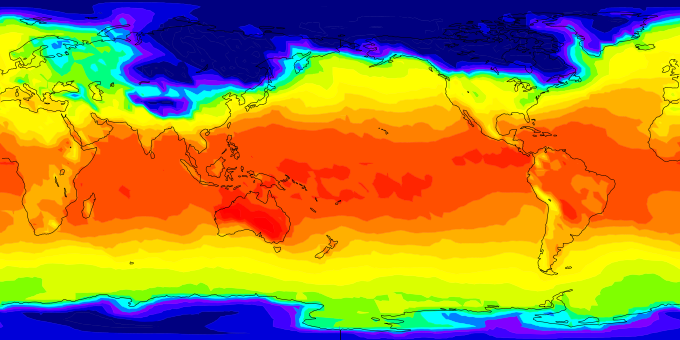

In [6]:
cml.plot_map(ds['t2m'][0, 0, 1, 0])

Due to the structure of the dataset, not every date has its own file. Loading a nonexistent date will trigger an error:

In [7]:
plds = cml.load_dataset('maelstrom-ens10', date='0105')

ValueError: The specified date cannot be found in the available files. Query available dates with ``Ens10.all_datelist``

To find all available dates, call `all_datelist`:

In [8]:
cmlds.all_datelist[0:10]

['0101',
 '0104',
 '0108',
 '0111',
 '0115',
 '0118',
 '0122',
 '0125',
 '0129',
 '0201']

Let's load January 4 in order to get the date that we want:

In [9]:
plds = cml.load_dataset('maelstrom-ens10', date='0104')

In [10]:
pldsx = plds.to_xarray()

In [11]:
pldsx

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 11, latitude: 361, longitude: 720, number: 10, step: 3, time: 20)
Coordinates:
  * number         (number) int64 1 2 3 4 5 6 7 8 9 10
  * time           (time) datetime64[ns] 1998-01-04 1999-01-04 ... 2017-01-04
  * step           (step) timedelta64[ns] 0 days 1 days 2 days
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0 10.0
  * latitude       (latitude) float64 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude      (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    valid_time     (time, step) datetime64[ns] dask.array<chunksize=(20, 3), meta=np.ndarray>
Data variables:
    z              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    t              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    q              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    w              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    d              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    u              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
    v              (number, time, step, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(10, 20, 3, 11, 361, 720), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-07-31T13:03 GRIB to CDM+CF via cfgrib-0.9.9...

Similarly to surface-level data, let's draw the geopotential (parameter `z`) of the 1st ensemble member in January 5th, 2001 (year `3`, step `1` from 0104) on pressure level 500 hPa (index `4`, see dataset description with `pldsx['z']`):

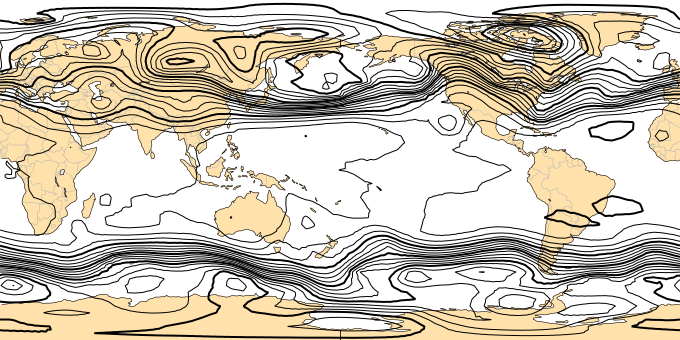

In [12]:
cml.plot_map(pldsx['z'][0, 3, 1, 4])